In [1]:
import Random 

### Rozmieszczenie każdych możliwych pakietów żywnosciowych

In [34]:
function environment2(n,m) ###generuje środowisko z pakietami
    if n % 3 != 0
        throw(DomainError(size, "incorrect size"))
    end
    
    Environment = zeros(Int64, n, m)
    
    for i in 2:3:n
        Environment[i,:] = ones(Int64, 1, m)
    end
    return Environment
end

function environment_poison(Environment) ###zatruwa środowisko - wprowadza zatrute oraz puste pakiety
    
    n = size(Environment)[1]
    m = size(Environment)[2]
    
    liczba = floor((n/3*m) * 0.15)  #szacowanie około 15? % wszystkich możliwych pakietów
    ilosc_pakietow = rand(1:liczba) + 5  #randomowe przypisanie konkretnej ilości danego rodzaju pakietów w danym wywołaniu
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = -1
    end
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = 0
    end
    
    return Environment
end

environment_poison (generic function with 1 method)

### Funkcja usuwająca konkretną rzecz z macierzy

In [3]:
function remove!(a, item)
    deleteat!(a, findall(x -> x == item, a))
    return a
end

remove! (generic function with 1 method)

### Funkcja decydująca o dalszym losie ptaszków

In [4]:
function roll_for_pakiet(some_fate)
    fate = rand(1:101)
    if fate <= some_fate
        return true
    end
end

roll_for_pakiet (generic function with 1 method)

### Funkcja generująca rozstawienie ptaków w środowisku

In [31]:
function find_place(macierz, g, ja, ch_g, ch_j)
    n = size(macierz)[1]
    m = size(macierz)[2]
    slots = 2*n*m/3
    amount_of_birds = g + ja + ch_g + ch_j
    birds = [7, 10, 70, 100] ##gołąb-7, jastrząb-10, chory gołąb -10, chory jastrząb - 100
    any_bird = [g, ja, ch_g, ch_j] ###ilość każdego z ptaków
    
    if amount_of_birds > slots ###jeśli ptaków jest więcej niż miejsc - iteracja po miejscach
        for i in 1:slots
            pustka = findall(x -> x == 0, any_bird) ## jeśli każdy ptaszek z danego gatunku już jest przydzielony to go usuwamy
            pustka = reverse(pustka) ## lub w danym wywolaniu konkretnego ptaka juz nie ma
            if length(pustka) != 0
                for k in pustka
                    n = birds[k] 
                    birds = remove!(birds, n) ## usuniecie konkretnej wartosci ptaka
                end
                any_bird = remove!(any_bird, 0)  ## usunuwanie 0 z macierzy z aktualna iloscia ptakow
            end
            number = rand(1:length(birds))
            current_bird = birds[number]
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = current_bird ##przydzielamy ptaszka randomowo
            any_bird[number] -= 1
        end
        
    elseif slots > amount_of_birds ###jeśli miejsc jest więcej niż ptaków - iteracja po ptakach
        for i in 1:amount_of_birds
            pustka = findall(x -> x == 0, any_bird)
            pustka = reverse(pustka)
            if length(pustka) != 0
                for k in pustka
                    n = birds[k]
                    birds = remove!(birds, n)
                end
                any_bird = remove!(any_bird, 0)
            end
            number = rand(1:length(birds))
            current_bird = birds[number]
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = current_bird
            any_bird[number] -= 1
        end
    end
    macierz = environment_poison(macierz) ##zatruwamy środowisko
    
    ###sprawdzenie nadpopulacji
    
    f_gol = 0
    f_jas = 0
    f_chg =0 
    f_chj = 0
    
    if length(birds) != 0
        for i in 1:length(birds)
            if birds[i] == 7
                f_gol += any_bird[i]
            elseif birds[i] == 10
                f_jas += any_bird[i]
            elseif birds[i] == 70
                f_chg += any_bird[i]
            elseif birds[i] == 100
                f_chj += any_bird[i]
            end
        end
    end
    
    return macierz, f_gol, f_jas, f_chg, f_chj ###zwraca macierz środowiska, ilość ptaków w nim oraz tych do fight clubu
end

find_place (generic function with 1 method)

### Potyczki przy pakietach

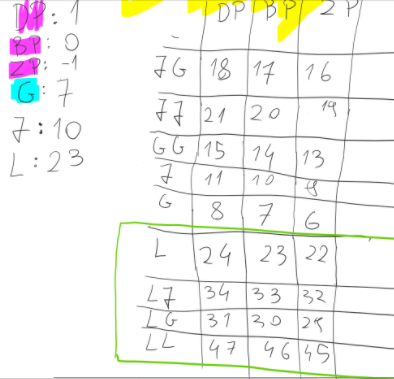

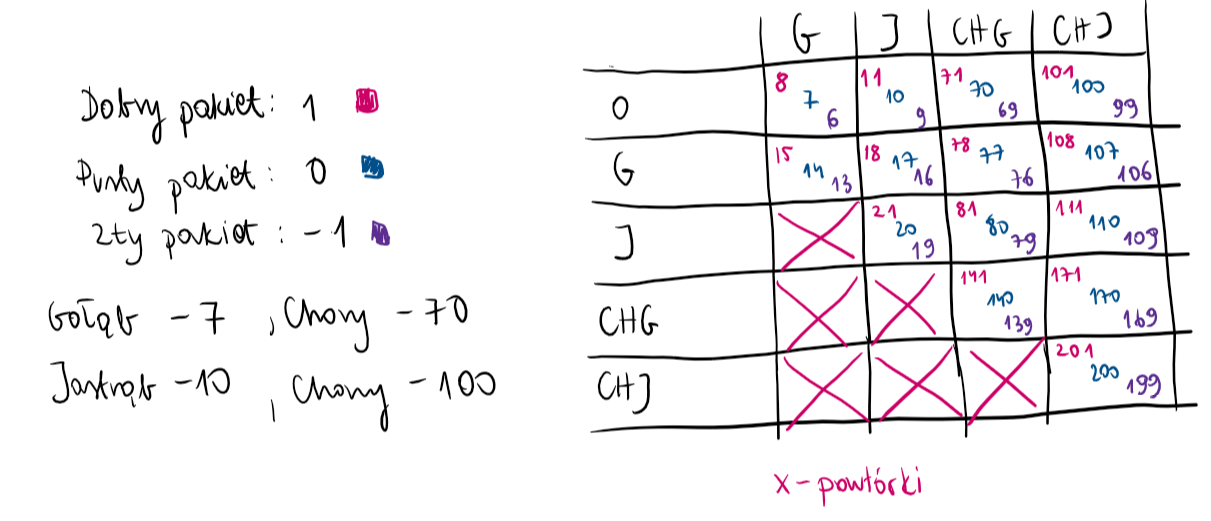


In [6]:
function death(bird, deadliness)
    for i in 1:bird
        if roll_for_pakiet(deadliness) == true
            bird -= 1
        end
    end
    return bird
end

death (generic function with 1 method)

In [7]:
function sickness(ch_g, ch_j, deadliness)
    ch_g = death(ch_g, deadliness)
    
    ch_j = death(ch_j, deadliness)
    return ch_g, ch_j
end

sickness (generic function with 1 method)

In [32]:
function potyczki(n, m, macierz, g, ja, ch_g = 0, ch_j = 0)
    for i in 2:3:n, j in 1:m    
        suma = macierz[i - 1, j] + macierz[i, j] + macierz[i + 1, j]
        
        if suma == 18
            #Jastrząb i Gołąb dobry pakiet
            ja += 1
            if roll_for_pakiet(50) == true
                g -= 1
            end
            
        elseif suma == 17 || suma == 7
            #Jastrząb i Gołąb pusty pakiet 
            #Gołąb pusty pakiet
            g -= 1
            
        elseif suma == 16
            #Jastrząb i Gołąb zatruty pakiet
            g -= 1
            ja -= 1
            if roll_for_pakiet(20) == true
                ch_j += 1
            end    
            
        elseif suma == 15
            #Gołąb i Gołąb dobry pakiet
           continue    # g = g
            
        elseif suma == 8
            #Gołąb dobry pakiet
            g += 1
            
        elseif suma == 11
            #Jastrząb dobry pakiet
            ja += 1
            
        elseif suma == 9 || suma == 10
            #Jastrząb  zatruty pakiet
            #Jastrząb  pusty pakiet
            ja -= 1
        
        elseif suma == 6
            #Gołąb zatruty pakiet
            g -= 1 
            if roll_for_pakiet(20) == true
                ch_g += 1
            end        
        
        elseif suma == 81
            #Jastrząb i Ch_Gołąb dobry pakiet
            if roll_for_pakiet(10) == true
                ja -= 1
                ch_j += 1
            end    
            if roll_for_pakiet(50) == true
                    ch_g -= 1
            end
                
        elseif suma == 108
            #Ch_Jastrząb i Gołąb dobry pakiet
            if roll_for_pakiet(10) == true
                g -= 1
                ch_g += 1
            end
            if roll_for_pakiet(50) == true
                ch_j -= 1
                ja += 1
            else
                ch_j += 1
            end
        
        elseif suma == 20 || suma == 19 || suma == 21
            #Jastrząb i Jastrząb pusty pakiet 
            #Jastrząb i Jastrząb zatruty pakiet
            #Jastrząb i Jastrząb dobry pakiet
            ja -= 2
        
        elseif suma == 111 || suma == 110 || suma == 109 
            #Ch_Jastrząb i Jastrząb dobry pakiet  
            #Ch_Jastrząb i Jastrząb zatruty pakiet
            #Ch_Jastrząb i Jastrząb pusty pakiet
            ch_j -= 1
            ja -= 1
            
        elseif suma == 201 || suma == 200 || suma == 199
            #Ch_Jastrząb i Ch_Jastrząb dobry pakiet 
            #Ch_Jastrząb i Ch_Jastrząb pusty pakiet
            #Ch_Jastrząb i Ch_Jastrząb zatruty pakiet
            ch_j -= 2
            
        elseif suma == 141
            #Ch_Gołąb i Ch_Gołąb dobry pakiet
            continue   #ch_g = ch_g
            
        elseif suma == 71
            #Ch_Gołąb dobry pakiet
            if roll_for_pakiet(50) == true
                ch_g -= 1
                g += 1
            else
                ch_g += 1
            end
            
        elseif suma == 101
            #Ch_Jastrząb dobry pakiet
            if roll_for_pakiet(50) == true
                ch_j -= 1
                ja += 1
            else
                ch_j += 1
            end
        
        elseif suma == 78
            #Ch_Gołąb i Gołąb dobry pakiet
            if roll_for_pakiet(60) == true
                ch_g += 1
                g -= 1
            end

        elseif suma == 14
            #Gołąb i Gołąb pusty pakiet
            g -= 2

                
         elseif suma == 80
            #Jastrząb i Ch_Gołąb pusty pakiet
            g -= 1
            ja -= 1
            ch_j += 1
        
        elseif suma == 107
            #Ch_Jastrząb i Gołąb pusty pakiet
            g -= 1
            if roll_for_pakiet(30) == true
                ch_j -= 1
                ja += 1
            end

        elseif suma == 140
            #Ch_Gołąb i Ch_Gołąb pusty pakiet
            ch_g -= 2
            
        elseif suma == 70 || suma == 69
            #Ch_Gołąb pusty pakiet  
            #Ch_Gołąb zatruty pakiet
            ch_g -= 1
            
        elseif suma == 100 || suma == 99
            #Ch_Jastrząb pusty pakiet 
            #Ch_Jastrząb zatruty pakiet
            ch_j -= 1

        elseif suma == 77
            #Ch_Gołąb i Gołąb pusty pakiet
            ch_g -= 1
            g -= 1

        elseif suma == 13
            #Gołąb i Gołąb zatruty pakiet
            g -= 2
            if roll_for_pakiet(6) == true
                ch_g += 2
            end
        
         elseif suma == 79
            #Jastrząb i Ch_Gołąb zatruty pakiet
            ch_g -= 1 
            ja -= 1
            if roll_for_pakiet(70) == true
                ch_j += 1
            end
            
        elseif suma == 106
            #Ch_Jastrząb i Gołąb zatruty pakiet
            g -= 1
            if roll_for_pakiet(40) == true
                ch_j -= 1
            end
                
        elseif suma == 139
            #Ch_Gołąb i Ch_Gołąb zatruty pakiet
            if roll_for_pakiet(1) == false
                ch_g -= 2
            end

        elseif suma == 76
            #Ch_Gołąb i Gołąb zatruty pakiet
            g -= 1
            if roll_for_pakiet(2) == true
                ch_g += 1
            end
        end 
    end
    sick_birds = sickness(ch_g, ch_j, 5)
    ch_g = sick_birds[1]
    ch_j = sick_birds[2]

    return g, ja, ch_g, ch_j
end

potyczki (generic function with 3 methods)

### Fight club

In [9]:
function ptaszki(macierz, n, k) #numer przypisany do konkretnego ptaka
    if n != 0  
        for i in 1:1:n
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = k
        end
    end
end

ptaszki (generic function with 1 method)

### Funkcja tworząca macierz do przeprowadzenia walk

In [10]:
function fight_club2(g, j, ch_g, ch_j)
    all_birds = g + j + ch_g + ch_j
    if all_birds!= 0
        if all_birds%2 == 0
            m = Int64(all_birds/2)
            fight_macierz = zeros(Int64, 2, m)
            ptaszki(fight_macierz, g, 7)
            ptaszki(fight_macierz, j, 10)
            ptaszki(fight_macierz, ch_g, 70)
            ptaszki(fight_macierz, ch_j, 100)
        else
            all_birds += 1
            m = Int64(all_birds/2)
            fight_macierz = zeros(Int64, 2, m)
            ptaszki(fight_macierz, g, 7)
            ptaszki(fight_macierz, j, 10)
            ptaszki(fight_macierz, ch_g, 70)
            ptaszki(fight_macierz, ch_j, 100)
        end
        return fight_macierz
    end
end     

fight_club2 (generic function with 1 method)

### Fight

In [12]:
function fight2(macierz ,g, j, ch_g, ch_j)
    m = size(macierz)[2]
    for i in 1:m
        suma = macierz[1, i] + macierz[2, i]
        if suma == 7 || suma == 14 || suma == 77  
            #sam g, gg, g chg 
            g -= 1
            
        elseif suma == 10 || suma == 20 || suma == 110   
            #sam j, jj, j chj 
            j -= 1
            
        elseif suma == 70 || suma == 140 
            #sam chg, chg chg
            ch_g -= 1
            
        elseif suma == 100 || suma == 200   
            #sam chj, chj chj
            ch_j -= 1
            
        elseif suma == 17   #g, j
            if roll_for_pakiet(66) == true
                g -= 1
            else 
                j -= 1
            end  
            
        elseif suma == 107   #chj, g
            g -= 1
            if roll_for_pakiet(66) == false
                ch_j -= 1
                ch_g += 1
            end  
            
        elseif suma == 80 #chg, j
            j -= 1
            if roll_for_pakiet(66) == true
                ch_j += 1
                ch_g -= 1
            end   
            
        elseif suma == 170  #chg, chj
            if roll_for_pakiet(66) == true
                ch_g -= 1
            else
                ch_j -= 1
            end 
            
        end
    end
    return g, j, ch_g, ch_j
end

fight2 (generic function with 1 method)

### 🎂🎂🐱‍👤🐱‍👤

In [14]:
function action(n, m, g, j, ch_g, ch_j, p)
    
    if p == 0
        return "tada"
    end
    max_amount = 2*m*n/3
    amount_of_birds = g + j + ch_j + ch_g
    
    srodowisko = environment2(n, m)
    first_try = find_place(srodowisko, g, j, ch_g, ch_j)
    macierz = first_try[1]
    f_gol = first_try[2] 
    f_jas = first_try[3]
    f_chg =  first_try[4] 
    f_chja = first_try[5] 
    
    g_p = length(findall(x -> x == 7, macierz))
    j_p = length(findall(x -> x == 10, macierz))
    chg_p = length(findall(x -> x == 70, macierz))
    chj_p = length(findall(x -> x == 100, macierz))
    potyczki_result = potyczki(n, m, macierz, g_p, j_p, chg_p, chj_p)
    
    if amount_of_birds > max_amount
        fight = fight_club2(f_gol, f_jas, f_chg, f_chja)
        fight_result = fight2(fight, f_gol, f_jas, f_chg, f_chja)
        final_g = potyczki_result[1] + fight_result[1]
        final_j = potyczki_result[2] + fight_result[2]
        final_chg = potyczki_result[3] + fight_result[3]
        final_chj = potyczki_result[4] + fight_result[4]
    else
        final_g = potyczki_result[1] 
        final_j = potyczki_result[2] 
        final_chg = potyczki_result[3] 
        final_chj = potyczki_result[4] 
    end
        
    
    println(final_g,", ", final_j,", ", final_chg, ", ",final_chj)
    
    action(n, m , final_g, final_j, final_chg, final_chj, p-1)
end
    

action (generic function with 1 method)

In [37]:
action(12, 12, 50, 50, 50, 50, 30)

18, 20, 38, 35
7, 11, 30, 16
8, 8, 29, 13
3, 5, 23, 7
8, 5, 15, 3
9, 6, 9, 5
11, 7, 3, 6
19, 9, 1, 4
21, 13, 1, 0
18, 15, 0, 0
14, 16, 0, 1
19, 20, 0, 0
18, 21, 1, 0
14, 27, 2, 0
16, 20, 2, 0
16, 27, 2, 0
16, 16, 2, 0
17, 14, 2, 0
23, 14, 1, 0
28, 17, 3, 0
24, 27, 2, 0
16, 21, 2, 1
21, 24, 0, 0
17, 28, 0, 0
10, 28, 1, 2
10, 20, 0, 2
12, 16, 0, 0
12, 15, 1, 0
11, 12, 2, 0
9, 14, 1, 0


"tada"